**<span style="color: #808080;">In The Name of God</span>**

---

**<span style="color: #808080;">Erfan Falahati</span>**

**<span style="color: #808080;">SID:</span> <span style="color: #808080;">810102491</span>**

# **<span style="color: #3399FF;">Computer Assignment #3: Machine Learning</span>**


In [551]:
DATASET_PATH = 'content/Grades.csv'

In [552]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(DATASET_PATH)

# **<span style="color: #C0C0C0;">Data Exploration in Tableau</span>**

# **<span style="color: #C0C0C0;">Preprocessing and Feauture Engineering</span>**

## **<span style="color: #66B2FF;">Dataset Overview</span>** 

In [553]:
df.head(5)

,university,sex,age,address,motherEducation,fatherEducation,motherJob,fatherJob,reason,travelTime,...,internet,romantic,freeTime,goOut,Dalc,Walc,absences,EPSGrade,DSGrade,finalGrade
0,PR,F,18,U,4,4,at_home,teacher,course,2,...,no,no,3,4,1,1,6,5,6,6
1,PR,F,17,U,1,1,at_home,other,course,1,...,yes,no,3,3,1,1,4,5,5,6
2,PR,F,15,U,1,1,at_home,other,other,1,...,yes,no,3,2,2,3,10,7,8,10
3,PR,F,15,U,4,2,health,services,home,1,...,yes,yes,2,2,1,1,2,15,14,15
4,PR,F,16,U,3,3,other,other,home,1,...,no,no,3,2,1,2,4,6,10,10


In [554]:
df.describe()

,age,motherEducation,fatherEducation,travelTime,studyTime,failures,freeTime,goOut,Dalc,Walc,absences,EPSGrade,DSGrade,finalGrade
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,16.705290,2.748111,2.521411,1.450882,2.032746,0.335013,3.234257,3.108312,1.478589,2.289673,5.695214,10.881612,10.687657,10.377834
std,1.279716,1.097301,1.090672,0.696840,0.838731,0.742714,0.996476,1.112762,0.889143,1.286770,7.988015,3.333120,3.770322,4.604928
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,1.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,3.000000,3.000000,1.000000,2.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,4.000000,4.000000,2.000000,3.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [555]:
from IPython.display import Markdown, display

display(Markdown("### 📁 Check for NaN values"))
display(df.isnull().sum().to_frame(name='Null Count').style.set_caption("Raw Bounding Box Info"))


### 📁 Check for NaN values

,Null Count
university,0
sex,0
age,0
address,0
motherEducation,0
fatherEducation,0
motherJob,0
fatherJob,0
reason,0
travelTime,0


## **<span style="color: #66B2FF;">Preprocess</span>** 

### **Handle the others values** 

In [556]:
df_v1 = df.copy()
other_ratio_mother_job = df_v1[df_v1['fatherJob'] == 'other']['fatherJob'].count() / df_v1.shape[0]
other_ratio_fatherjob = df_v1[df_v1['motherJob'] == 'other']['motherJob'].count() / df_v1.shape[0]
other_ration_reason = df_v1[df_v1['reason'] == 'other']['reason'].count() / df_v1.shape[0]


print("other counts for columns:")
print(f"motherJob others percentage: % {other_ratio_mother_job}")
print(f"fatherJob others percentage: % {other_ratio_fatherjob}")
print(f"reason others percentage: % {other_ration_reason}")


other counts for columns:
motherJob others percentage: % 0.5465994962216625
fatherJob others percentage: % 0.35768261964735515
reason others percentage: % 0.09319899244332494


In [557]:
df_v2 = df_v1.drop(columns=['fatherJob', 'motherJob'])

#### **Predict the reason** 

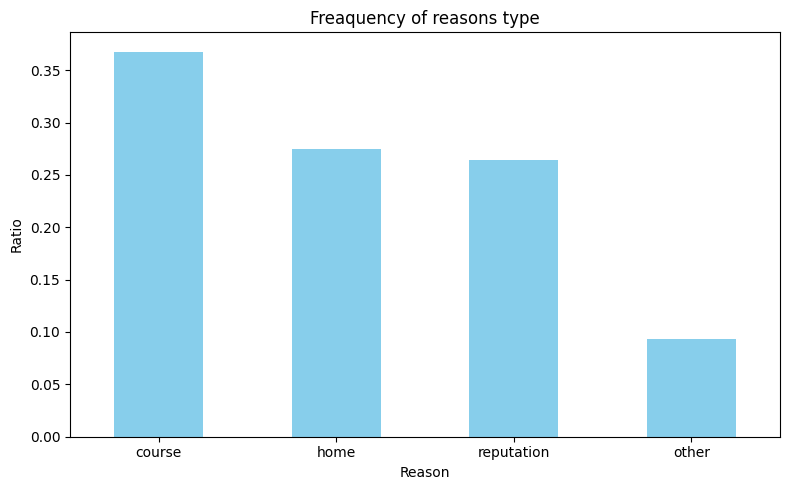

In [558]:
reasons_ratio = df_v2['reason'].value_counts() / df_v2.shape[0]

plt.figure(figsize=(8, 5))
reasons_ratio.plot(kind='bar', color='skyblue')

plt.title('Freaquency of reasons type')
plt.xlabel('Reason')
plt.ylabel('Ratio')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [559]:
near_home_other_ratio = df_v2[(df_v2['reason'] == 'other') & (df_v2['travelTime'] == 1)]['reason'].count() / df_v2[df_v2['reason'] == 'other'].shape[0]
print(f"reason others percentage: % {near_home_other_ratio}")

reason others percentage: % 0.6216216216216216


In [560]:
df_v2.loc[(df_v2['travelTime'] == 1) & (df['reason'] == 'other'), 'reason'] = 'home'
df_v2.loc[df_v2['reason'] == 'other', 'reason'] = 'course'

### **Map (yes,no) columns to (0,1)** 

In [561]:
df_v3 = df_v2.copy()
binary_map = {'yes': 1, 'no': 0}
columns_to_convert = ['paid', 'higher', 'internet', 'romantic', 'universitySupport']

for col in columns_to_convert:
    df_v3[col] = df_v3[col].map(binary_map)


### **Categorical Conversion** 

#### *Grade*

In [562]:
def categorize_grade(grade):
    if grade > 17:
        return 'A'
    elif 14 <= grade <= 17:
        return 'B'
    elif 10 <= grade < 14:
        return 'C'
    else:
        return 'F'
    
df_v4 = df_v3.copy()
df_v4['finalGrade'] = df_v4['finalGrade'].apply(categorize_grade)

### **Final Data** 

In [563]:
final_df = df_v4.copy()
final_df.to_csv('content/cleaned_data.csv')

# **<span style="color: #C0C0C0;">Models</span>**